## CONVERT TO GRAPH

In [1]:
import torch
from torch_geometric.data import Data
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import StandardScaler
import networkx as nx
import pandas as pd
import processing_functions as pf
import numpy as np

import Model_prep as MP

In [2]:
node_data = {
    'state_id': [0, 1, 2, 3],
    'median_income': [75000, 60000, 80000, 62000],
    'unemployment_rate': [4.5, 6.2, 3.9, 5.5]
}
nodes_df = pd.DataFrame(node_data).set_index('state_id')

# Sample Edge List (source -> destination)
edge_list = [[0, 1], [0, 2], [1, 3], [2, 3]]
edges_df = pd.DataFrame(edge_list, columns=['source', 'destination'])

In [3]:
edge_list

[[0, 1], [0, 2], [1, 3], [2, 3]]

In [4]:
#Load Node features and edge matrix
nodes = pf.load_hdf5('Model_Data.h5')
edges = pf.load_hdf5('Edge_Data.h5')

In [5]:
nodes[2005]

,pop_16+,median_household_income
NAME,,
Alabama,4442558.0,36879.0
Alaska,641724.0,56234.0
Arizona,5829839.0,44282.0
Arkansas,2701431.0,34999.0
California,35278768.0,53629.0
Colorado,4562244.0,50652.0
Connecticut,3394751.0,60941.0
Delaware,818587.0,52499.0
Florida,17382511.0,42433.0


In [6]:
#for year in nodes.keys():
    #nodes[year]['homevaluetoincome'] = nodes[year]['median_homevalue'] / nodes[year]['personal_income']
    #nodes[year]['renttoincome'] = nodes[year]['median_rent'] / nodes[year]['personal_income']
    #nodes[year]['gdp_per_capita'] = nodes[year]['gdp'] / nodes[year]['pop_25+']


In [7]:
nodes[2005]

,pop_16+,median_household_income
NAME,,
Alabama,4442558.0,36879.0
Alaska,641724.0,56234.0
Arizona,5829839.0,44282.0
Arkansas,2701431.0,34999.0
California,35278768.0,53629.0
Colorado,4562244.0,50652.0
Connecticut,3394751.0,60941.0
Delaware,818587.0,52499.0
Florida,17382511.0,42433.0


In [8]:
YEARS = [y for y in range(2005, 2024) if y != 2020]
train_years = [y for y in YEARS if 2005 <= y <= 2014]
val_years = [y for y in YEARS if 2015 <= y <= 2016]
test_years = [y for y in YEARS if 2017<= y <= 2019]

In [9]:
STATES = nodes[2005].index.tolist()
# create mapping from state names to indeces
state_to_idx = {state: i for i, state in enumerate(STATES)}
num_nodes = len(STATES)

## NODE FEATURES

In [10]:
nodes[2015].corr()

,pop_16+,median_household_income
pop_16+,1.000000,0.075412
median_household_income,0.075412,1.000000


In [11]:
## LIST OF TENSORS FOR EACH YEAR
node_tensors,scaler_nodes = MP.node_prep(nodes, train_years,YEARS)

## EDGE CONNECTIVITY MATRIX

In [12]:
import copy
target,pop_16 = MP.edge_format(edges, nodes)
target = MP.normalize_by_pop(target, pop_16)
e = copy.deepcopy(target)

In [13]:
e[0]

,destination_state,origin_state,flow,aligned_divisor,result_rate
1,Alabama,Alaska,608.0,641724.0,0.000947
2,Alabama,Arizona,574.0,5829839.0,0.000098
3,Alabama,Arkansas,3168.0,2701431.0,0.001173
4,Alabama,California,3025.0,35278768.0,0.000086
5,Alabama,Colorado,1922.0,4562244.0,0.000421
...,...,...,...,...,...
2494,Wyoming,Vermont,0.0,602290.0,0.000000
2495,Wyoming,Virginia,445.0,7332608.0,0.000061
2496,Wyoming,Washington,781.0,6146338.0,0.000127
2497,Wyoming,West Virginia,49.0,1771750.0,0.000028


In [14]:
edge_index = MP.Knn_edges(target, k=5)

c:\Users\naoki\GNN_BOOK\gnns_in_action\census\Model_prep.py:107: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(k, 'result_rate'))
c:\Users\naoki\GNN_BOOK\gnns_in_action\census\Model_prep.py:107: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(k, 'result_rate'))
c:\Users\naoki\GNN_BOOK\gnns_in_action\census\Model_prep.py:107: FutureWarning: DataFrameGroupBy.apply o

In [15]:
import copy

indexes = MP.create_edge_index(edge_index, state_to_idx)

c:\Users\naoki\GNN_BOOK\gnns_in_action\census\Model_prep.py:118: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  edge_index = torch.tensor([source, target], dtype=torch.long)


In [16]:
idx_to_state = {v: k for k, v in state_to_idx.items()}

In [17]:
for i, edge_index in enumerate(indexes):
    print(f"\n--- Graph {i} ---")
    
    # Option A: Print the raw tensor
    print("Raw Tensor (shape", list(edge_index.shape), "):\n", edge_index)
    
    # Option B: Print a human-readable list of edges
    print("\nHuman-Readable Edges:")
    # Transpose the tensor so we can loop through pairs of [source, target]
    i = 0
    for edge in edge_index.T:
        i += 1
        source_idx = edge[0].item()
        target_idx = edge[1].item()
        
        source_name = idx_to_state.get(source_idx, 'Unknown')
        target_name = idx_to_state.get(target_idx, 'Unknown')
        
        print(f"  {source_name} ({source_idx}) --> {target_name} ({target_idx})")
    print(i)


--- Graph 0 ---
Raw Tensor (shape [2, 250] ):
 tensor([[23,  9, 41,  3, 17, 46, 23, 11, 43, 40, 30, 27, 49, 43,  1, 35, 24, 23,
         17,  1, 27, 10,  1, 46,  2, 49,  1, 30, 26, 25, 38, 44, 31, 28, 20, 19,
         37,  1, 38, 29, 38, 28, 31,  9,  1,  0,  1,  8, 39, 41, 11, 27, 43,  4,
          5, 43,  1, 25, 49, 36,  1, 14, 13, 24, 48, 16, 12, 21, 34, 24, 40, 26,
         49, 33, 12, 24, 49, 35,  5, 26, 13, 47, 41, 34, 10, 23,  1,  3, 42, 15,
         28, 20,  6, 38,  1,  7, 45, 47, 18, 10, 28, 38, 18, 44,  6,  1, 13, 34,
         27, 48, 33, 40, 48, 14,  1, 17, 41,  0,  3,  1, 15,  3, 26, 35, 14, 49,
         33, 46, 36, 11, 40, 14, 49, 15,  5, 43,  4, 25, 10,  1, 44, 18, 20,  1,
         25, 31, 38, 37,  7,  1,  5,  2,  1, 27, 42, 44, 29,  6, 20, 38, 39, 45,
         49,  9, 19, 22, 40, 25, 15, 46, 47, 16, 13, 21,  7, 49,  3, 15, 42, 40,
         11, 46,  1, 25,  4,  7, 29, 19, 47, 31, 20, 18, 28,  6, 27, 44, 32,  9,
         19, 45, 49, 33, 14, 26, 25, 23, 16,  3,  0, 17, 17, 

In [18]:
target,pop_16 = MP.edge_format(edges, nodes)
target = MP.normalize_by_pop(target, pop_16)
All_ind = MP.create_edge_index(target, state_to_idx)

## 

## EDGE FEATUERS

In [19]:
features_edges,scaler_edge_feature = MP.edge_feature_total(e,nodes,state_to_idx,train_years)
features_edges[0].shape

torch.Size([2450, 1])

## TARGET FEATURES

In [20]:
## List of 1 by num of edges tensors for each year


target, pop_16 = MP.edge_format(edges,nodes)


In [21]:
target_tensors,scaler_target = MP.target_prep(target, pop_16, train_years)

## PYG DATA OBJECT

In [22]:
import copy
indexes_GNN = copy.deepcopy(indexes)
indexes_ALL = All_ind
#indexes_ALL = copy.deepcopy(indexes)
Data_L = MP.create_data_objects(node_tensors, indexes_GNN,indexes_ALL,features_edges, target_tensors, YEARS)

In [27]:
Data_L[1].edge_features

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

# MODELS

In [28]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, SAGEConv
from torch_geometric.data import Data
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
train_data = [d for d in Data_L if d.year in train_years]
val_data = [d for d in Data_L if d.year in val_years]
test_data = [d for d in Data_L if d.year in test_years]




device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = SimpleGNN(num_node_features=train_data[0].x.shape[1],num_edge_features=train_data[0].edge_features.shape[1],hidden_dim_G=64, hidden_dim_N=64, num_layers=1,heads=4)
model.to(device)
train_losses, val_losses = train_model(model, train_data, val_data, epochs=125,lr=0.007, device=device)
predictions, targets = evaluate_model(model, test_data,device=device)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[10:], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [33]:
import Models as M
num_node_features = 11
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

baseline_model = M.BaselineMLP(
    num_node_features=num_node_features,
    hidden_dim=128
)

baseline_model.to(device)
model = torch.compile(baseline_model) 
print("--- Training the Baseline MLP Model ---")
# --- Train the Baseline Model ---
# Use your existing train_model function
train_losses, val_losses = M.train_modelMLP(
    baseline_model, 
     train_data, val_data,device,
    epochs=300,
    lr=0.002
)

print("\n--- Evaluating the Baseline MLP Model ---")
# --- Evaluate the Baseline Model ---
# Use your existing evaluate_model function
predictions, targets = M.evaluate_modelMLP(
    baseline_model, 
    test_data,
    device,
    scale = scaler_target
)

Using device: cuda
--- Training the Baseline MLP Model ---


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2450x4 and 22x128)

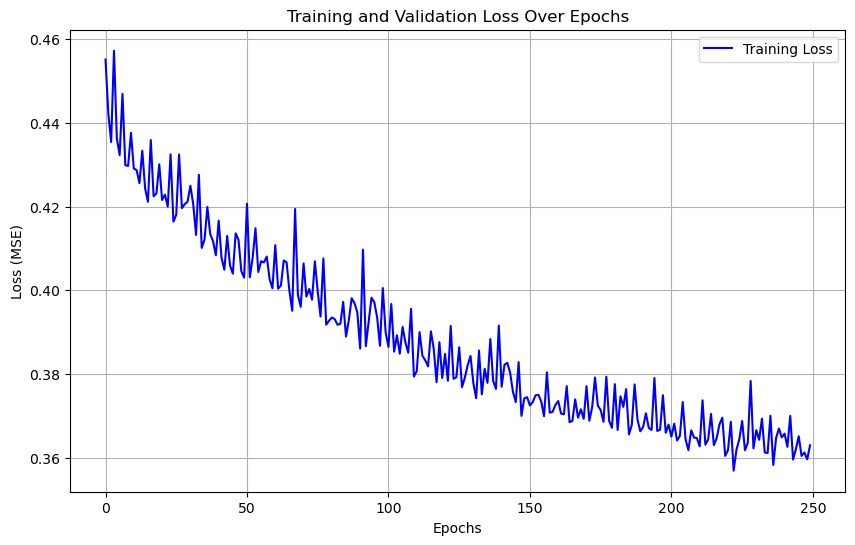

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[50:1000], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [25]:
train_data = [d for d in Data_L if d.year in train_years]
val_data = [d for d in Data_L if d.year in val_years]
test_data = [d for d in Data_L if d.year in test_years]

In [26]:
import Transformer as T

scaler_nodes = scaler_nodes
scaler_edge_feature = scaler_edge_feature
scaler_target = scaler_target

epoch = 100
learning_rate=0.001
dimensions = 256
dropout = 0.2
heads = 4
n_node_feat,n_edge_feat = train_data[0].x.shape[1],train_data[0].edge_features.shape[1]
model, train_losses, val_losses, predictions = T.transformerSimple(epochs = epoch, 
                                                                 lr = learning_rate, 
                                                                 dropout = dropout, 
                                                                 n_node_features = n_node_feat, 
                                                                 n_edge_features = n_edge_feat,
                                                                 hidden_dim=dimensions,
                                                                 n_heads=heads,
                                                                train_data=train_data,
                                                                val_data=val_data,
                                                                test_data=test_data
                                                                )




Epoch 10/100, Train Loss: 0.6255, Val Loss: 0.5865
Epoch 20/100, Train Loss: 0.5663, Val Loss: 0.5726
Epoch 30/100, Train Loss: 0.5188, Val Loss: 0.5209
Epoch 40/100, Train Loss: 0.4907, Val Loss: 0.5101
Epoch 50/100, Train Loss: 0.4655, Val Loss: 0.4956
Epoch 60/100, Train Loss: 0.4346, Val Loss: 0.4640
Epoch 70/100, Train Loss: 0.4197, Val Loss: 0.4348
Epoch 80/100, Train Loss: 0.3995, Val Loss: 0.4278
Epoch 90/100, Train Loss: 0.3636, Val Loss: 0.4287
Epoch 100/100, Train Loss: 0.3520, Val Loss: 0.4118
Test MSE: 0.5893
Test R²: 0.4181
Test MAE: 0.5799
Test MAPE: 314.55%


In [30]:
import Transformer as T

scaler_nodes = scaler_nodes
scaler_edge_feature = scaler_edge_feature
scaler_target = scaler_target

epoch = 120
learning_rate=0.001
dimensions = 128
dropout = 0.5
heads = 4
layers =3
n_node_feat,n_edge_feat = train_data[0].x.shape[1],train_data[0].edge_features.shape[1]
model, train_losses, val_losses, predictions = T.transformerComplex(epochs = epoch, 
                                                                 lr = learning_rate, 
                                                                 dropout = dropout, 
                                                                 n_node_features = n_node_feat, 
                                                                 n_edge_features = n_edge_feat,
                                                                 hidden_dim=dimensions,
                                                                 n_heads=heads,
                                                                train_data=train_data,
                                                                val_data=val_data,
                                                                test_data=test_data,
                                                                layers = layers,
                                                                gradient_clip=1.0
                                                                )

Epoch 10/120, Train Loss: 0.6341, Val Loss: 0.5790
Epoch 20/120, Train Loss: 0.4609, Val Loss: 0.4005
Epoch 30/120, Train Loss: 0.4151, Val Loss: 0.3622
Epoch 40/120, Train Loss: 0.3691, Val Loss: 0.3192
Epoch 50/120, Train Loss: 0.3431, Val Loss: 0.2924
Epoch 60/120, Train Loss: 0.3318, Val Loss: 0.2868
Epoch 70/120, Train Loss: 0.3174, Val Loss: 0.2740
Epoch 80/120, Train Loss: 0.3091, Val Loss: 0.2721
Epoch 90/120, Train Loss: 0.2959, Val Loss: 0.2623
Epoch 100/120, Train Loss: 0.2952, Val Loss: 0.2614
Epoch 110/120, Train Loss: 0.2896, Val Loss: 0.2559
Epoch 120/120, Train Loss: 0.2825, Val Loss: 0.2551
Test MSE: 0.2667
Test R²: 0.7367
Test MAE: 0.3786
Test MAPE: 224.03%


In [31]:
n_node_feat

2

In [32]:
n_edge_feat

1

In [40]:
Test MSE: 0.2734
Test R²: 0.7301

SyntaxError: invalid character '²' (U+00B2) (681738976.py, line 2)

In [ ]:
Test MSE: 0.2648
Test R²: 0.7385

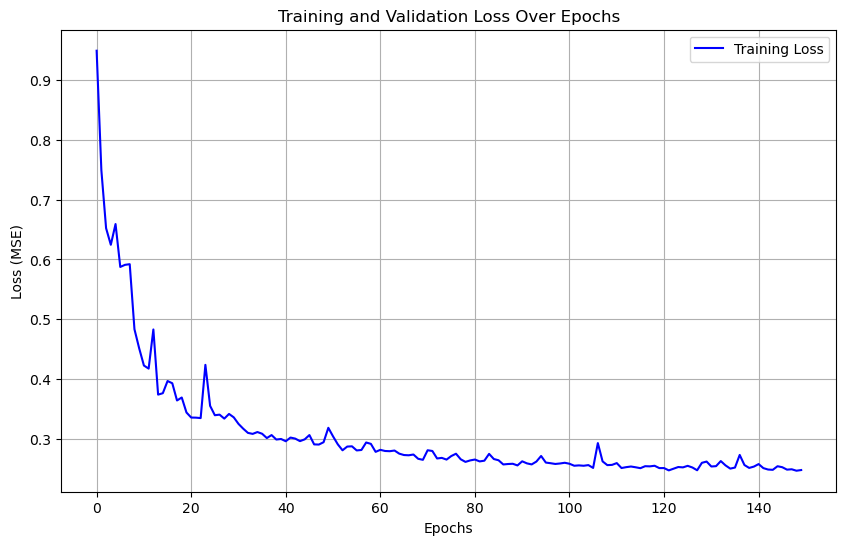

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[0:150], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [ ]:
Test MSE: 0.2955
Test R²: 0.7082
Test MAE: 0.3827
Test MAPE: 204.75%

Test MSE: 0.3026
Test R²: 0.7012
Test MAE: 0.3915
Test MAPE: 187.12%

Test MSE: 0.2981
Test R²: 0.7056
Test MAE: 0.3881
Test MAPE: 205.52%a

In [ ]:
Test MSE: 0.3018
Test R²: 0.7020
Test MAE: 0.3862
Test MAPE: 214.72%

Test MSE: 0.2890
Test R²: 0.7146
Test MAE: 0.3862
Test MAPE: 195.43%

Test MSE: 0.2804
Test R²: 0.7231
Test MAE: 0.3756
Test MAPE: 210.03%

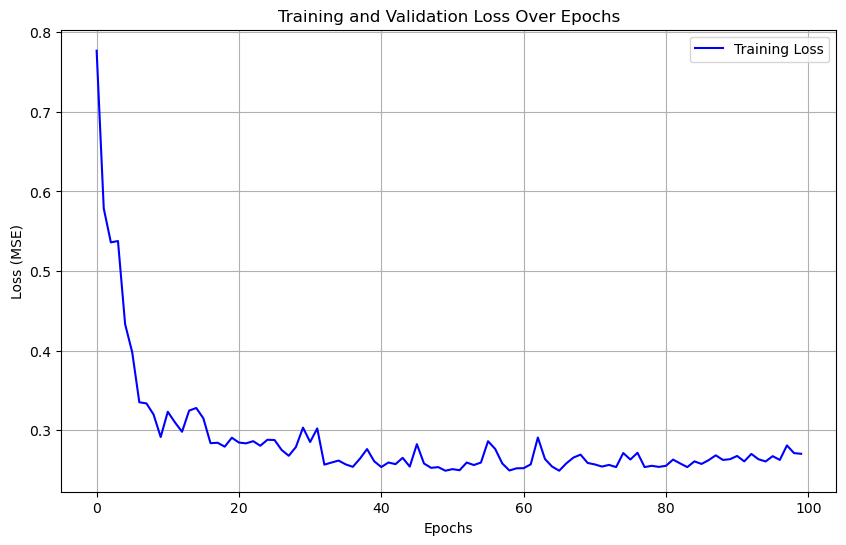

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[0:100], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [26]:
scaler_nodes = scaler_nodes
scaler_edge_feature = scaler_edge_feature
scaler_target = scaler_target

def inverse_transform(predictions, scaler_target):
    

SyntaxError: incomplete input (3435836096.py, line 6)

In [ ]:
n_node_feat,n_edge_feat = train_data[0].x.shape[1],train_data[0].edge_features.shape[1]
model = MigrationAttention(
    n_states=50,
    n_node_features=n_node_feat,  # economic indicators, demographics
    n_edge_features=n_edge_feat,  # distance, historical flows
    hidden_dim=256,
    n_heads=16
)

# Train
model, train_losses, val_losses = train_transformer(
    model, train_data, val_data,
    epochs=300,lr=0.0007
)

# Get explanations
predictions = evaluate_transformer(model,
    test_data
)

Test MSE: 0.3980
Test R²: 0.4974
Test MAE: 0.2940
Test MAPE: 155.52%

Test MSE: 0.4333
Test R²: 0.4529
Test MAE: 0.3338
Test MAPE: 180.31%

Test MSE: 0.4221
Test R²: 0.4670
Test MAE: 0.2994
Test MAPE: 174.25%

Test MSE: 0.3879
Test R²: 0.5102
Test MAE: 0.2971
Test MAPE: 148.96%

Test MSE: 0.3911
Test R²: 0.5061
Test MAE: 0.3095
Test MAPE: 175.24%

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[50:1000], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.plot(val_losses[50:1000], label='Training Loss', color='blue')


# 3. Add labels, title, and legend
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 4. Display the plot
plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def analyze_migration_distribution(train_data, val_data, test_data):
    """
    Comprehensive analysis of migration data distribution to inform model choices.
    """
    # Extract all target values
    all_targets = []
    for data in train_data + val_data + test_data:
        all_targets.extend(data.y.cpu().numpy())
    all_targets = np.array(all_targets)
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Migration Data Distribution Analysis', fontsize=16)
    
    # 1. Histogram with KDE
    ax = axes[0, 0]
    ax.hist(all_targets, bins=50, density=True, alpha=0.7, edgecolor='black')
    kde = stats.gaussian_kde(all_targets)
    x_range = np.linspace(all_targets.min(), all_targets.max(), 100)
    ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    ax.set_title('Distribution of Migration Rates')
    ax.set_xlabel('Standardized Migration Rate')
    ax.set_ylabel('Density')
    ax.legend()
    
    # 2. Q-Q Plot for normality
    ax = axes[0, 1]
    stats.probplot(all_targets, dist="norm", plot=ax)
    ax.set_title('Q-Q Plot (Check Normality)')
    
    # 3. Box plot with outliers
    ax = axes[0, 2]
    box = ax.boxplot(all_targets, vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    ax.set_title('Box Plot (Outlier Detection)')
    ax.set_ylabel('Migration Rate')
    
    # 4. Log-transformed distribution
    ax = axes[1, 0]
    # Handle negative values for log transform
    shifted_targets = all_targets - all_targets.min() + 1e-6
    log_targets = np.log(shifted_targets)
    ax.hist(log_targets, bins=50, alpha=0.7, edgecolor='black')
    ax.set_title('Log-Transformed Distribution')
    ax.set_xlabel('Log(Migration + shift)')
    
    # 5. Cumulative distribution
    ax = axes[1, 1]
    sorted_targets = np.sort(all_targets)
    cumulative = np.arange(1, len(sorted_targets) + 1) / len(sorted_targets)
    ax.plot(sorted_targets, cumulative, linewidth=2)
    ax.set_title('Cumulative Distribution')
    ax.set_xlabel('Migration Rate')
    ax.set_ylabel('Cumulative Probability')
    ax.grid(True, alpha=0.3)
    
    # 6. Tail analysis
    ax = axes[1, 2]
    lower_tail = np.percentile(all_targets, 5)
    upper_tail = np.percentile(all_targets, 95)
    ax.hist(all_targets[all_targets < lower_tail], bins=20, alpha=0.5, label='Lower 5%', color='blue')
    ax.hist(all_targets[all_targets > upper_tail], bins=20, alpha=0.5, label='Upper 5%', color='red')
    ax.set_title('Tail Distribution')
    ax.set_xlabel('Migration Rate')
    ax.legend()
    
    # 7. Residuals from mean
    ax = axes[2, 0]
    residuals = all_targets - all_targets.mean()
    ax.scatter(range(len(residuals)), residuals, alpha=0.5, s=1)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title('Residuals from Mean')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Residual')
    
    # 8. Density comparison with normal
    ax = axes[2, 1]
    ax.hist(all_targets, bins=50, density=True, alpha=0.5, label='Actual')
    mu, std = all_targets.mean(), all_targets.std()
    x = np.linspace(all_targets.min(), all_targets.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, std), 'r-', label='Normal')
    ax.set_title('Actual vs Normal Distribution')
    ax.legend()
    
    # 9. Statistics summary
    ax = axes[2, 2]
    ax.axis('off')
    stats_text = f"""
    Distribution Statistics:
    
    Mean: {all_targets.mean():.4f}
    Median: {np.median(all_targets):.4f}
    Std Dev: {all_targets.std():.4f}
    Skewness: {stats.skew(all_targets):.4f}
    Kurtosis: {stats.kurtosis(all_targets):.4f}
    
    Min: {all_targets.min():.4f}
    25th %ile: {np.percentile(all_targets, 25):.4f}
    75th %ile: {np.percentile(all_targets, 75):.4f}
    Max: {all_targets.max():.4f}
    
    % Negative: {(all_targets < 0).mean()*100:.1f}%
    % Near Zero: {(np.abs(all_targets) < 0.1).mean()*100:.1f}%
    """
    ax.text(0.1, 0.5, stats_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='center', fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    # Return statistics for loss function recommendations
    return {
        'skewness': stats.skew(all_targets),
        'kurtosis': stats.kurtosis(all_targets),
        'has_outliers': np.abs(stats.zscore(all_targets)).max() > 3,
        'is_normal': stats.normaltest(all_targets).pvalue > 0.05,
        'has_negative': (all_targets < 0).any(),
        'heavy_tailed': stats.kurtosis(all_targets) > 3
    }


def recommend_loss_function(stats_dict):
    """
    Recommend loss functions based on distribution characteristics.
    """
    print("\n" + "="*50)
    print("Loss Function Recommendations:")
    print("="*50)
    
    if stats_dict['is_normal'] and not stats_dict['has_outliers']:
        print("✓ MSE Loss - Your data appears normally distributed")
    
    if stats_dict['has_outliers'] or stats_dict['heavy_tailed']:
        print("✓ Huber Loss - Robust to outliers in your data")
        print("✓ SmoothL1 Loss - Good alternative to Huber")
    
    if abs(stats_dict['skewness']) > 1:
        print("✓ MAE/L1 Loss - Better for skewed distributions")
        print("✓ Quantile Loss - Focus on median prediction")
    
    if stats_dict['heavy_tailed']:
        print("✓ Tukey's Biweight - Very robust for heavy tails")
        
    if stats_dict['has_negative']:
        print("\n⚠ Note: Data contains negative values")
        print("  Cannot use: Poisson, Gamma, or other count-based losses")
    
    print("\nRecommended testing order:")
    print("1. Start with MSE as baseline")
    print("2. Try Huber or SmoothL1 if outliers present")
    print("3. Test MAE if skewed")
    print("4. Custom weighted loss for specific needs")


def visualize_loss_behavior(all_targets):
    """
    Show how different loss functions behave with your data's error distribution.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Loss Function Behavior on Your Data Range', fontsize=14)
    
    # Simulate errors based on data statistics
    std = all_targets.std()
    errors = np.linspace(-3*std, 3*std, 100)
    
    # MSE
    ax = axes[0]
    mse = errors ** 2
    ax.plot(errors, mse, label='MSE', linewidth=2)
    ax.set_title('MSE Loss')
    ax.set_xlabel('Prediction Error')
    ax.set_ylabel('Loss')
    ax.grid(True, alpha=0.3)
    
    # MAE vs Huber
    ax = axes[1]
    mae = np.abs(errors)
    huber = np.where(np.abs(errors) <= 1, 0.5 * errors**2, np.abs(errors) - 0.5)
    ax.plot(errors, mae, label='MAE', linewidth=2)
    ax.plot(errors, huber, label='Huber (δ=1)', linewidth=2)
    ax.set_title('MAE vs Huber Loss')
    ax.set_xlabel('Prediction Error')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Log-cosh
    ax = axes[2]
    log_cosh = np.log(np.cosh(errors))
    ax.plot(errors, log_cosh, label='Log-Cosh', linewidth=2, color='green')
    ax.set_title('Log-Cosh Loss')
    ax.set_xlabel('Prediction Error')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
stats = analyze_migration_distribution(train_data, val_data, test_data)
recommend_loss_function(stats)
